<a href="https://colab.research.google.com/github/nidhiparker333/Python/blob/main/Customer_Segmentation_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd

import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [37]:
df = pd.read_csv(path + "/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [39]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [41]:
df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

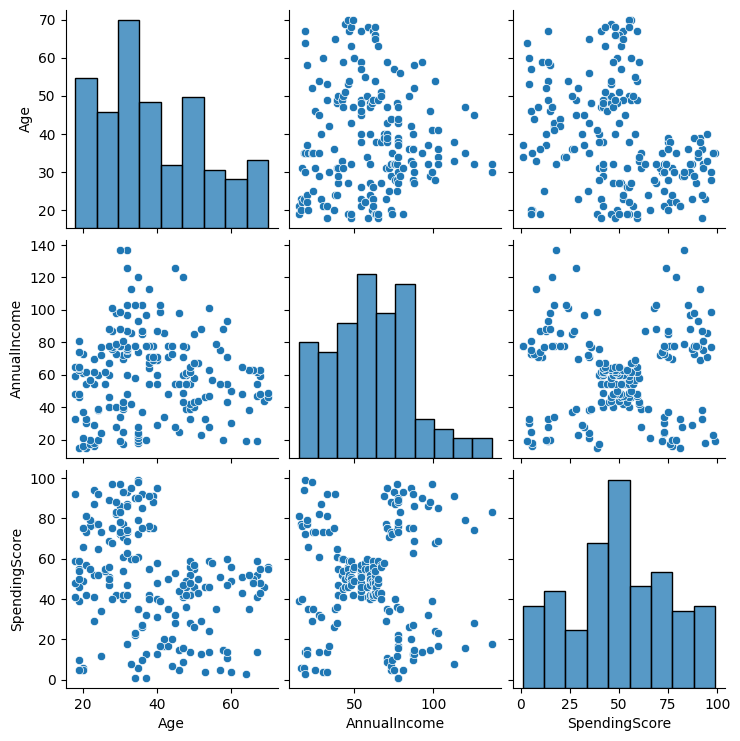

In [43]:
sns.pairplot(df[['Age', 'AnnualIncome', 'SpendingScore']])
plt.show

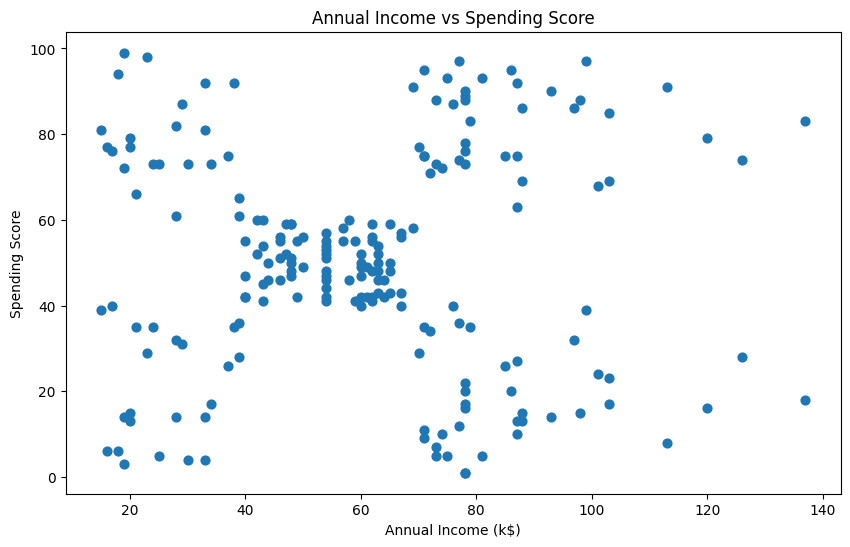

In [44]:
# Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], s = 40)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')
plt.show()

In [45]:
from sklearn.cluster import KMeans

X= df [['AnnualIncome', 'SpendingScore']]

from sklearn.cluster import KMeans

X= df [['AnnualIncome', 'SpendingScore']]

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


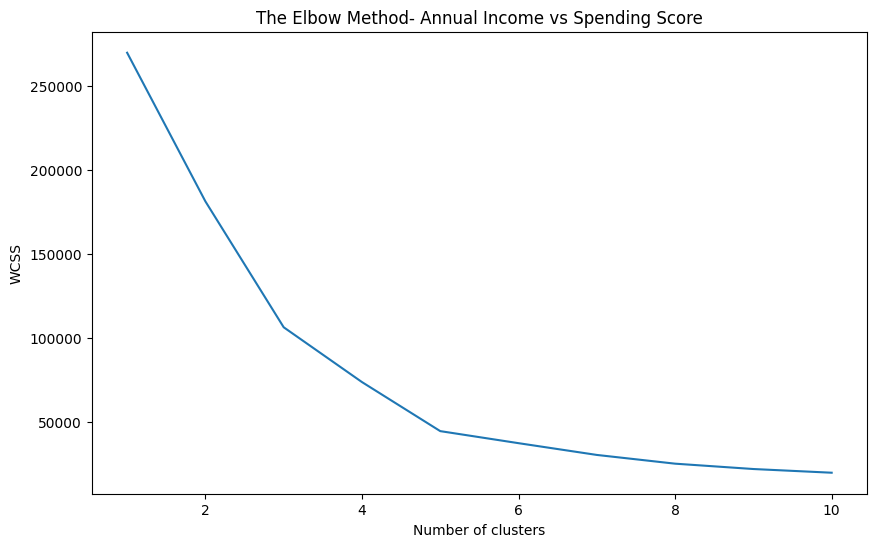

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method- Annual Income vs Spending Score')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
kmeans = KMeans(n_clusters = 5, init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [48]:
df['Cluster-AnnualIncome'] = y_kmeans
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster-AnnualIncome
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


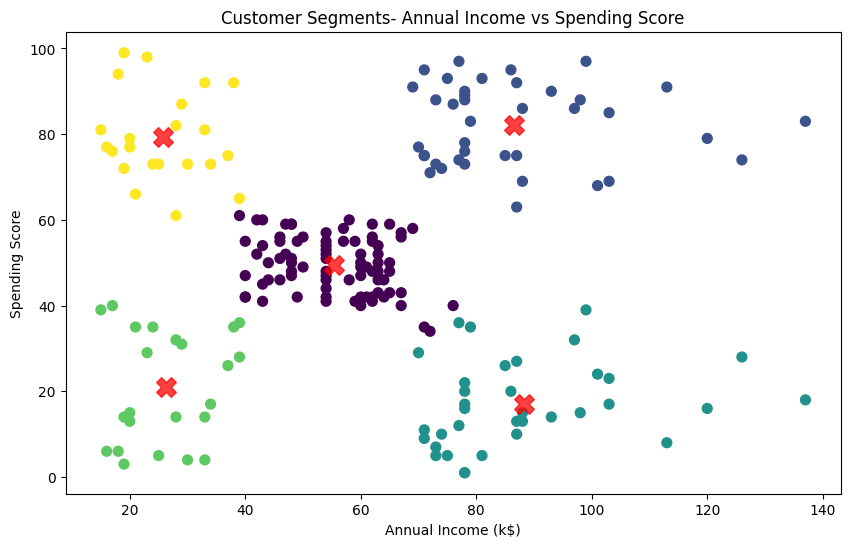

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:, 0],X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker= 'X')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Customer Segments- Annual Income vs Spending Score')
plt.show()

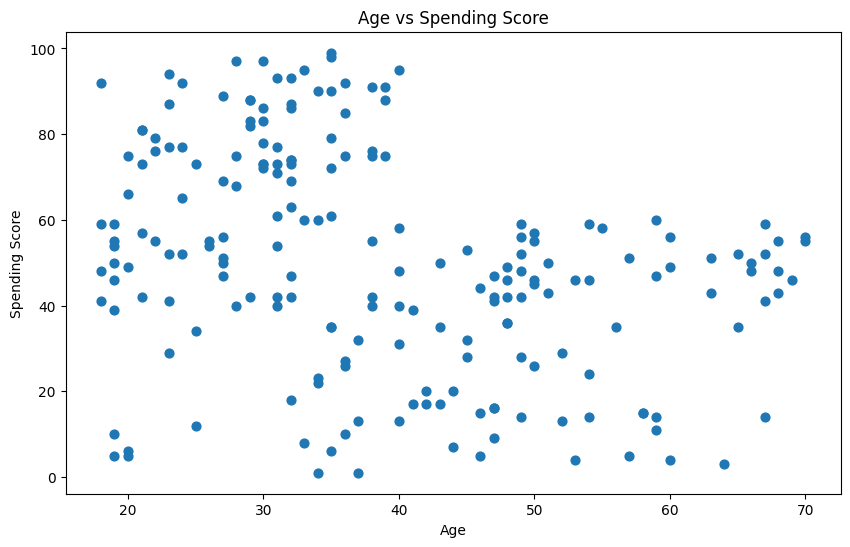

In [50]:
# Age vs Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['SpendingScore'], s = 40)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.show()

In [51]:
from sklearn.cluster import KMeans

X= df [['Age', 'SpendingScore']]

from sklearn.cluster import KMeans

X= df [['Age', 'SpendingScore']]

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


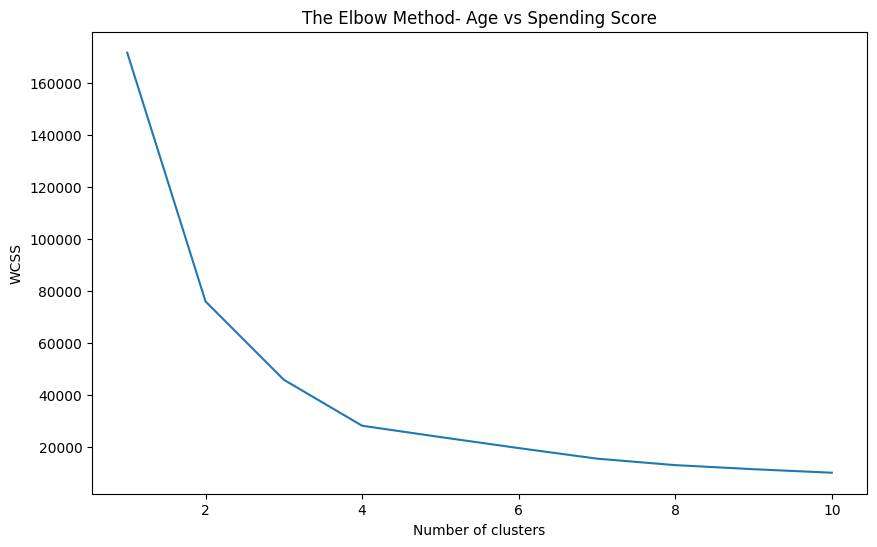

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method- Age vs Spending Score')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
kmeans = KMeans(n_clusters = 4, init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [54]:
df['Cluster-Age'] = y_kmeans
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster-AnnualIncome,Cluster-Age
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,3,2
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,3,3


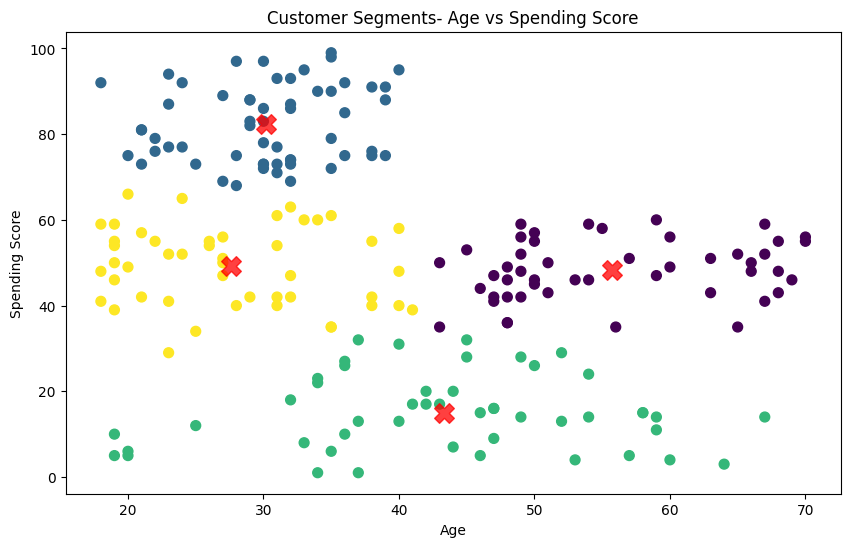

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:, 0],X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker= 'X')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segments- Age vs Spending Score')
plt.show()

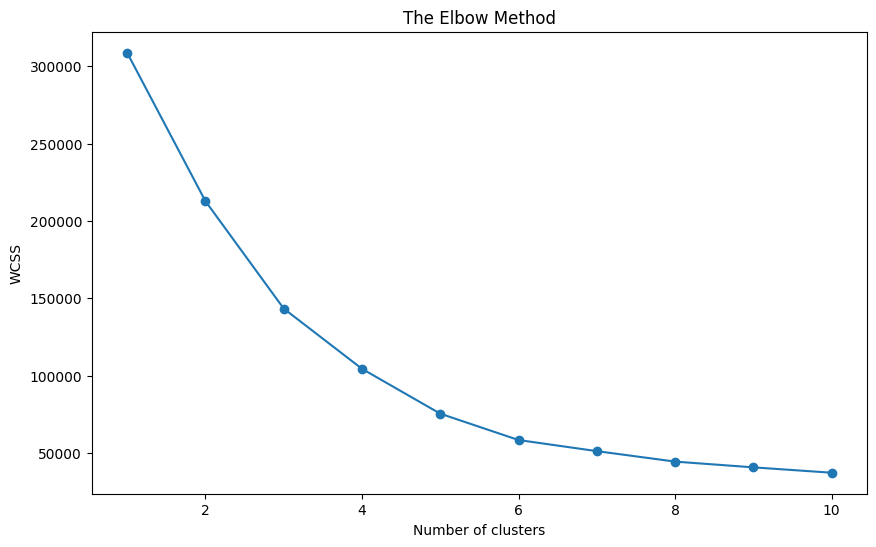

In [62]:
#Selecting features for clustering
X = df[['AnnualIncome', 'SpendingScore', 'Age']]

#Determining optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#Plotting the Elbow Graph
plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
#Applying kmeans with chosen # of clusters
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

df['ClusterAgeIncomeSpend'] = y_kmeans
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster-AnnualIncome,Cluster-Age,ClusterAgeIncomeSpend
0,1,Male,19,15,39,3,3,4
1,2,Male,21,15,81,4,1,5
2,3,Female,20,16,6,3,2,4
3,4,Female,23,16,77,4,1,5
4,5,Female,31,17,40,3,3,4


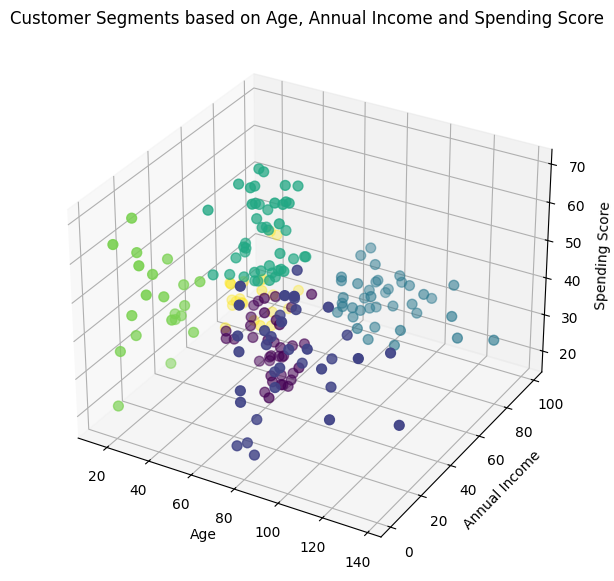

In [72]:
#Visualizing the clusters in a 3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['AnnualIncome'], df['SpendingScore'], df['Age'], c = df['ClusterAgeIncomeSpend'], s = 50, cmap = 'viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('Customer Segments based on Age, Annual Income and Spending Score')
plt.show()